Argon dimer below:

In [1]:
# Length values are in Angstroms, Energy values are in electron volts, Angles are in degrees.
import numpy as np
from scipy.optimize import minimize
def lennard_jones(r, epsilon=0.01, sigma=3.4):
    v = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    return v
print(minimize(lennard_jones,4))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.00999999995038553
        x: [ 3.816e+00]
      nit: 4
      jac: [ 2.215e-06]
 hess_inv: [[ 2.063e+01]]
     nfev: 16
     njev: 8


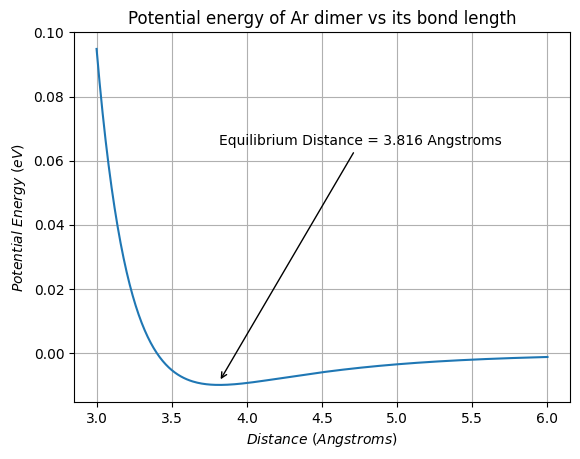

In [2]:
import matplotlib.pyplot as plt # Plotting the potential energy graph of the dimer
x = np.linspace(3,6,301)
plt.plot(x,lennard_jones(x))
plt.title('Potential energy of Ar dimer vs its bond length')
plt.xlabel(r'$Distance\ (Angstroms)$')
plt.ylabel(r'$Potential\ Energy\ (eV)$')
plt.grid(True)
plt.annotate('Equilibrium Distance = 3.816 Angstroms', xy=(3.816, -0.009), xytext=(3.816, .065), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

Argon trimer below:
Ar1 is at the origin, Ar2 is on the x-axis.

In [3]:
import math
def compute_bond_length(atom1:list,atom2:list):
    '''
    Computes the distance between two atoms
    Parameters:
    atom1 (list): Coordinates of the first atom
    atom2 (list): Coordinates of the second atom
    Returns:
    float: distance between the two atoms
    '''
    return ((atom1[0]-atom2[0])**2+(atom1[1]-atom2[1])**2+(atom1[2]-atom2[2])**2)**.5
def compute_bond_angle(a:list,b:list,c:list):
    '''
    Computes the bond angle between three atoms
    Parameters:
    a (list): Coordinates of the first outer atom
    b (list): Coordinates of the inner atom
    c (list): Coordinates of the second outer atom
    Returns:
    float: Angle (degrees) between the two bonds
    '''
    d = math.degrees(math.acos(((a[0]-b[0])*(c[0]-b[0])+(a[1]-b[1])*(c[1]-b[1])+(a[2]-b[2])*(c[2]-b[2]))/(compute_bond_length(a,b)*compute_bond_length(b,c))))
    return d


In [4]:
def V(D):
    r12 = D[0]
    x3 = D[1]
    y3 = D[2]
    E = lennard_jones(r12)+lennard_jones((x3**2+y3**2)**0.5)+lennard_jones(((r12-x3)**2+y3**2)**0.5)
    return E

In [5]:
guesses = [4,4,4]
print(minimize(V,guesses))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.02999999995029261
        x: [ 3.816e+00  1.908e+00  3.305e+00]
      nit: 16
      jac: [-1.580e-06  4.296e-07 -2.488e-06]
 hess_inv: [[ 2.025e+01  1.034e+01 -6.277e+00]
            [ 1.034e+01  4.531e+01 -2.541e+00]
            [-6.277e+00 -2.541e+00  1.413e+01]]
     nfev: 112
     njev: 28


In [19]:
Ar3={
    "Ar1":[0.000,0.000,0.000],
    "Ar2":[3.816,0.000,0.000],
    "Ar3":[1.908,3.305,0.000]
}
r12 = round(compute_bond_length(Ar3["Ar1"],Ar3["Ar2"]),3) # getting all the values ready for printing
r23 = round(compute_bond_length(Ar3["Ar2"],Ar3["Ar3"]),3)
r13 = round(compute_bond_length(Ar3["Ar1"],Ar3["Ar3"]),3)
a1 = round(compute_bond_angle(Ar3["Ar2"],Ar3["Ar1"],Ar3["Ar3"]))
a2 = round(compute_bond_angle(Ar3["Ar1"],Ar3["Ar2"],Ar3["Ar3"]))
a3 = round(compute_bond_angle(Ar3["Ar1"],Ar3["Ar3"],Ar3["Ar2"]))
print("Optimized trimer bond lengths:")
print("r12 =",r12,"; r23 =",r23,"; r13 =",r13)
print()
print("Optimized trimer bond angles")
print("a1 =",a1,"; a2 =",a2,"; a3 =",a3)

Optimized trimer bond lengths:
r12 = 3.816 ; r23 = 3.816 ; r13 = 3.816

Optimized trimer bond angles
a1 = 60 ; a2 = 60 ; a3 = 60


The argon trimer forms an equilateral triangle with sides of 3.816 angstroms. This makes sense, as it is the arrangement where all three argon atoms can minimize their bond potential energies between each other.